<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [476]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [477]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [478]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
df = df.drop(['Unnamed: 32'], axis=1)

In [480]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [481]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
df = df.set_index('id')

In [483]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [484]:
df.shape

(569, 30)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

In [486]:
X_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [487]:
scaled_df = pd.DataFrame(data=X_scaled, columns=df.columns)
scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_features=pca.fit_transform(scaled_df)


In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.scatter(ind, vals)
    ax.plot(ind, vals, color='r')
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

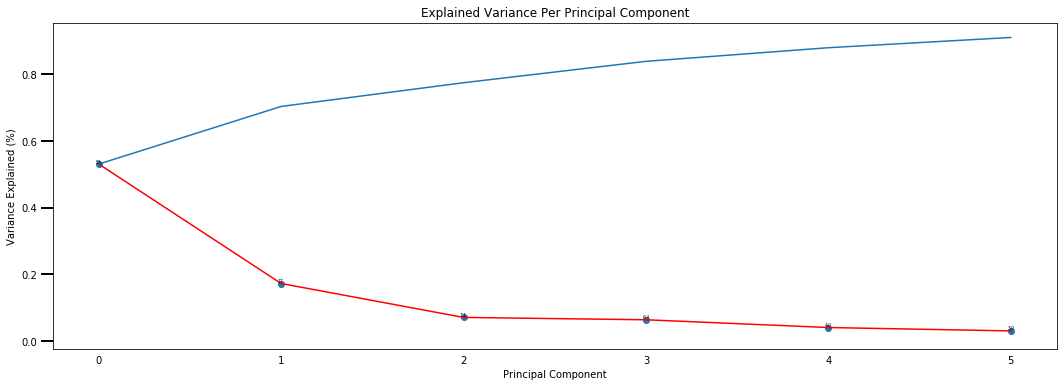

In [490]:
scree_plot(pca)

In [519]:
pca_features

array([[ 1.38702121e+00,  4.26895321e-01, -5.41701999e-01,
         4.84835096e-02, -7.22022496e-02,  1.90810250e-01],
       [ 4.62308252e-01, -5.56946736e-01, -2.05174824e-01,
        -4.28299603e-02,  1.61126917e-02,  1.56059818e-02],
       [ 9.54621472e-01, -1.09701151e-01, -1.47848225e-01,
        -1.06745651e-03, -3.37993984e-02,  6.90598724e-02],
       ...,
       [ 2.26311313e-01, -2.87945766e-01,  3.15224004e-01,
        -1.17468198e-02,  2.18517083e-01, -8.00052428e-02],
       [ 1.67783369e+00,  3.35945954e-01,  2.96116102e-01,
        -1.56304791e-01,  7.02034792e-02,  1.09056241e-01],
       [-9.05068041e-01, -1.04108749e-01,  3.82860240e-01,
         6.83606638e-02,  7.29843305e-02,  1.96656145e-01]])

In [520]:
pca_df = pd.DataFrame(data=pca_features)
pca_df

,0,1,2,3,4,5
0,1.387021,0.426895,-0.541702,0.048484,-0.072202,0.190810
1,0.462308,-0.556947,-0.205175,-0.042830,0.016113,0.015606
2,0.954621,-0.109701,-0.147848,-0.001067,-0.033799,0.069060
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388008
4,0.626828,-0.302471,-0.409336,0.238811,-0.002190,-0.157208
...,...,...,...,...,...,...
564,1.002840,-0.474785,-0.100041,0.272995,-0.083888,-0.309121
565,0.620757,-0.517200,0.400361,0.182443,-0.092984,-0.046000
566,0.226311,-0.287946,0.315224,-0.011747,0.218517,-0.080005
567,1.677834,0.335946,0.296116,-0.156305,0.070203,0.109056


In [561]:
pca_2df = pca_df[[0,5]]
pca_2df = pca_2df.rename(columns = {0:'x', 5: 'y'})
pca_2df

,x,y
0,1.387021,0.190810
1,0.462308,0.015606
2,0.954621,0.069060
3,1.000816,0.388008
4,0.626828,-0.157208
...,...,...
564,1.002840,-0.309121
565,0.620757,-0.046000
566,0.226311,-0.080005
567,1.677834,0.109056


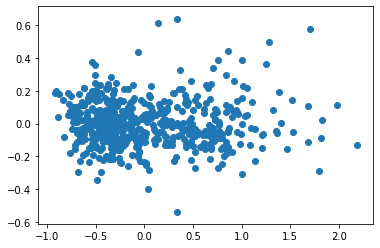

In [562]:
plt.scatter(pca_2df.x, pca_2df.y)


In [563]:
# Calculate the centroid 
dataset_centroid_x = pca_2df.x.mean()
dataset_centroid_y = pca_2df.y.mean()
print(dataset_centroid_x, dataset_centroid_y)

3.395058106938089e-17 4.273090375973801e-17


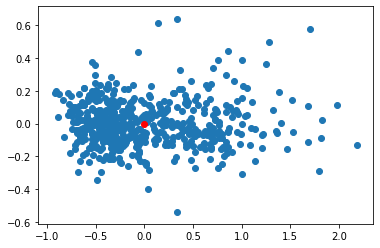

In [564]:
ax.plot(pca_2df.x, pca_2df.y)
ax=plt.subplot(1,1,1)
ax.scatter(pca_df[0], pca_df[5])
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()


In [565]:
# Initialize the algorigthm by choosing random points to serve as the initial "fake" centroids
centroids = pca_2df.sample(3)
centroids.head()

,x,y
39,0.240592,-0.130938
372,0.728934,0.019511
296,-0.751469,0.058225


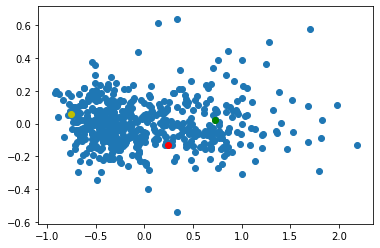

In [566]:
# Plot fake centroids
ax = plt.subplot(1,1,1)
plt.scatter(pca_2df.x, pca_2df.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "og")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [0]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [568]:
first_pass = find_nearest_centroid(pca_2df.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,1.387021,0.190810,1
1,0.462308,0.015606,0
2,0.954621,0.069060,1
3,1.000816,0.388008,1
4,0.626828,-0.157208,1


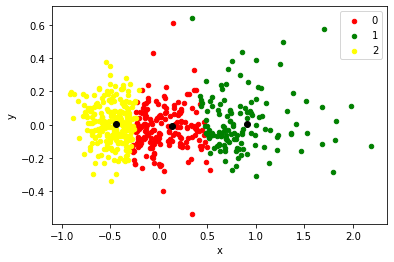

In [584]:
# function that color codes the above
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
# now recalculate the centroid again
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

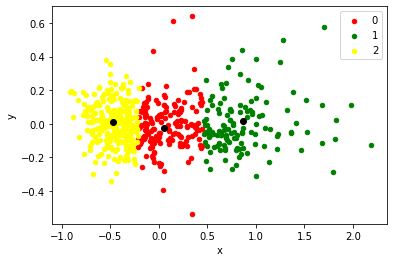

In [571]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

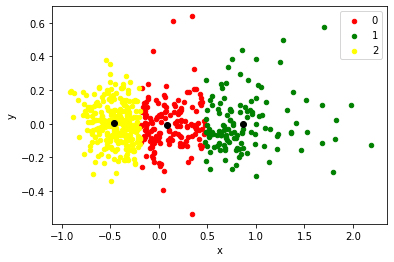

In [572]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

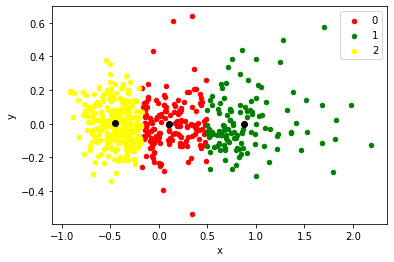

In [573]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

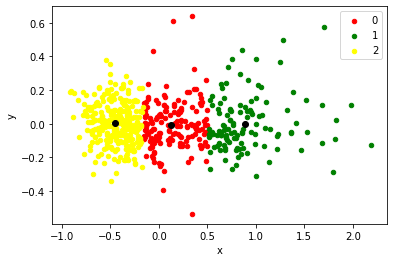

In [574]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

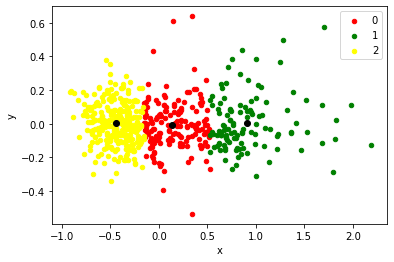

In [575]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

In [576]:
fifth_pass

,x,y,cluster_5
0,1.387021,0.190810,1
1,0.462308,0.015606,0
2,0.954621,0.069060,1
3,1.000816,0.388008,1
4,0.626828,-0.157208,1
...,...,...,...
564,1.002840,-0.309121,1
565,0.620757,-0.046000,1
566,0.226311,-0.080005,0
567,1.677834,0.109056,1


In [577]:
sixth_pass

,x,y,cluster_6
0,1.387021,0.190810,1
1,0.462308,0.015606,0
2,0.954621,0.069060,1
3,1.000816,0.388008,1
4,0.626828,-0.157208,1
...,...,...,...
564,1.002840,-0.309121,1
565,0.620757,-0.046000,1
566,0.226311,-0.080005,0
567,1.677834,0.109056,1


In [578]:
# so points not really moving, they are converging, they dont move, the cluster assignment does not change, the centroids do not move
# at convergence is when the cluster assignments are equal pairwise (comparing 5 and 6th pass in this case)

convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


In [585]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  return fig, ax
  
  
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True: ### Be careful about while loops
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

find_nearest_centroid(pca_2df, centroids).head()

,x,y,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7
0,1.387021,0.190810,1,1,1,1,1,1,1,1
1,0.462308,0.015606,0,0,0,0,0,0,0,0
2,0.954621,0.069060,1,1,1,1,1,1,1,1
3,1.000816,0.388008,1,1,1,1,1,1,1,1
4,0.626828,-0.157208,1,1,1,1,1,1,1,1


### SKLEARN Built-in function

In [592]:
# USE libray sklearn builtin
# same as above but using SKlearn to do it
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_2df)  # provide your data (X_scaled)
labels = kmeans.labels_

print(labels)

[1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 1 2 1 1 0 0 0 1 1 1 1 1 2 1 2 1 2 1 1 2 2 2
 0 0 2 0 2 1 2 2 1 0 2 0 0 0 0 0 2 2 0 1 2 0 0 0 0 1 0 2 2 0 0 2 0 2 0 1 2
 0 2 0 1 1 0 0 2 1 1 0 2 2 1 0 2 0 2 0 0 2 1 0 0 0 2 2 0 0 0 0 2 0 0 1 0 0
 2 2 0 0 0 0 2 1 2 0 2 1 2 0 0 2 2 2 1 0 2 2 2 2 0 0 0 2 0 0 2 0 0 0 0 2 2
 2 0 0 0 1 0 0 0 1 0 0 0 0 2 1 0 1 0 0 2 1 0 0 0 2 0 0 0 2 2 0 0 1 1 2 0 2
 0 2 0 0 0 1 0 0 2 2 0 2 2 1 2 0 2 1 1 0 2 0 2 2 0 1 0 1 2 2 2 0 0 1 1 0 0
 0 2 0 0 0 2 0 2 1 0 0 1 0 0 1 2 2 1 0 0 2 0 1 0 0 2 0 0 1 0 1 2 1 2 1 1 1
 1 1 2 2 0 2 1 0 0 0 0 0 0 1 0 2 0 0 2 0 0 1 0 1 2 0 0 0 0 0 0 2 2 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 1 0 0 0 0 2 2 2 0 0
 0 0 2 0 1 0 1 2 0 0 1 0 0 0 0 0 0 0 1 1 2 0 0 2 0 0 0 0 0 0 2 0 2 1 0 1 1
 1 0 1 1 0 2 2 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 1 1 0 0 2 0 0 0 1 0 0 0 0 0 2
 0 2 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 0 0 0 0 0 0 1 0 1 1 0 2 0 0 0 0 2 2 0 0
 2 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 2 1 0 0 0 2 2 0 1 2 0 0 0 0 0 0 2 0 0 1 0
 0 0 0 2 2 0 1 0 2 0 0 2 

In [593]:
pca_2df.head()

,x,y
0,1.387021,0.190810
1,0.462308,0.015606
2,0.954621,0.069060
3,1.000816,0.388008
4,0.626828,-0.157208


In [595]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
pca_2df['clusters'] = new_series.values

pca_2df.head(10)

,x,y,clusters
0,1.387021,0.190810,1
1,0.462308,0.015606,2
2,0.954621,0.069060,1
3,1.000816,0.388008,1
4,0.626828,-0.157208,1
5,0.383541,-0.028291,2
6,0.470176,-0.007417,2
7,0.282361,-0.103710,2
8,0.551512,0.110750,2
9,0.949182,-0.048690,1


In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  return fig, ax
  
  
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True: ### Be careful about while loops
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

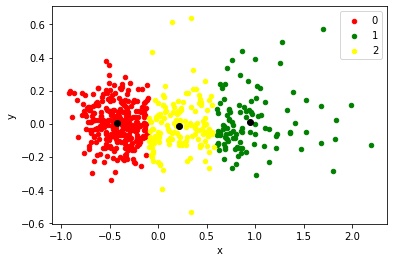

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f923069a588>)

In [598]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(pca_2df, 'clusters')
plot_clusters(pca_2df, 'clusters', centroids)

In [599]:
kmeans.cluster_centers_

array([[-0.42493115,  0.00371627],
       [ 0.94820313,  0.00715972],
       [ 0.21601787, -0.01306082]])

In [600]:
# tells at what point converged
kmeans.n_iter_

4

In [601]:
# measure of how close the points are to their respective centroid, plotted as inertia or Distortion, see graph below
kmeans.inertia_

39.24243722621803

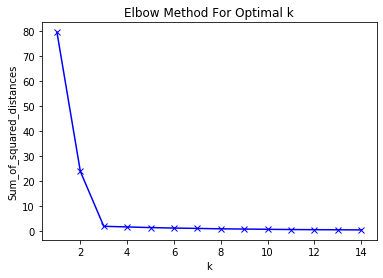

In [602]:
# ELBOW
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### FROM LECTURE

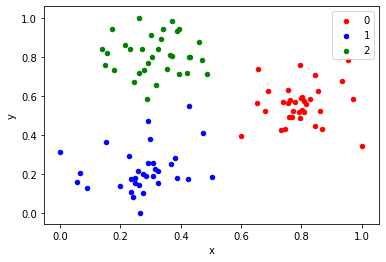

In [65]:
# from lecture
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

# Create dataframe of x, y and label values
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.5) # higher number for cluster_std, the higher the overlap
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


df = pd.DataFrame(dict(x=X_scaled[:,0], y=X_scaled[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green'}

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()                  

In [66]:
# Drop labels to prove that this is truly unsupervised learning
points = df.drop('label', axis=1)
points.head()

,x,y
0,0.690211,0.622958
1,0.087270,0.128736
2,0.246770,0.180462
3,0.809584,0.575181
4,0.425584,0.171505


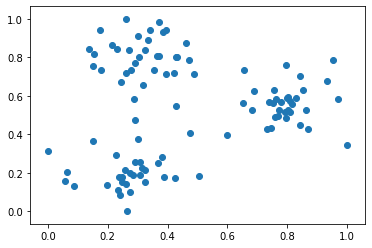

In [67]:
# Scatter plot of our label-less data
plt.scatter(points.x, points.y)
plt.show()

In [68]:
# Calculate the centroid of the entire dataset (only for demonstration purposes)
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

0.4646779020350011 0.5306782552592761


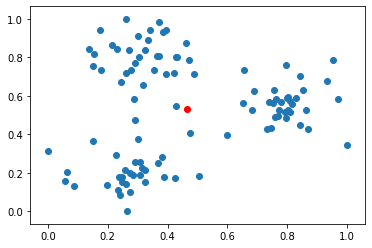

In [69]:
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

In [70]:
# Initialize the algorithm by choosing random points to serve as fake centroids
centroids = points.sample(3)
centroids.head()

,x,y
27,0.971023,0.584799
11,0.228775,0.294229
72,0.341579,0.942870


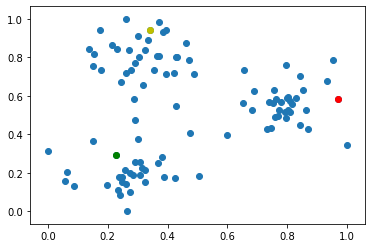

In [71]:
# Plot fake centroids
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "og")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [0]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [73]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,0.690211,0.622958,0
1,0.087270,0.128736,1
2,0.246770,0.180462,1
3,0.809584,0.575181,0
4,0.425584,0.171505,1


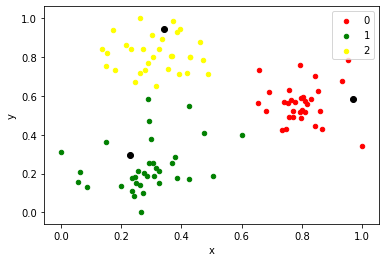

In [74]:
# function that color codes the above
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
# now recalculate the centroid again
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

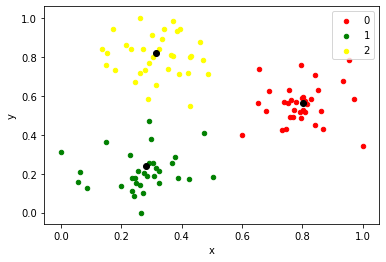

In [76]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

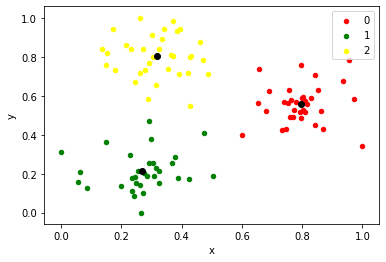

In [77]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

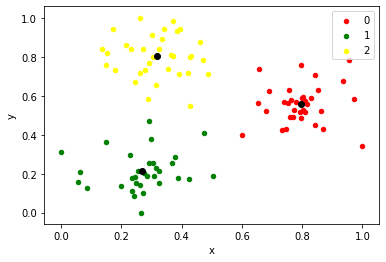

In [78]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

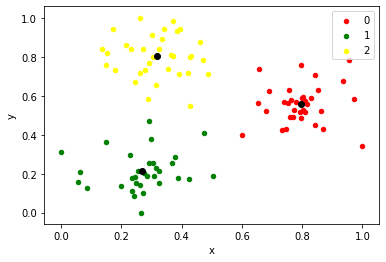

In [79]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

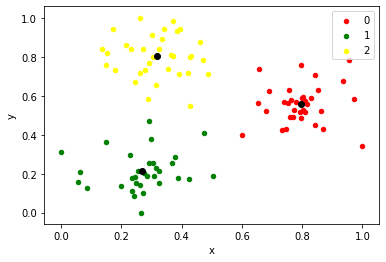

In [80]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

In [124]:
fifth_pass

,x,y,clusters,cluster_5
0,0.690211,0.622958,0,1
1,0.087270,0.128736,2,2
2,0.246770,0.180462,2,2
3,0.809584,0.575181,0,1
4,0.425584,0.171505,2,2
...,...,...,...,...
95,0.241761,0.083920,2,2
96,0.324437,0.152846,2,2
97,0.236481,0.175987,2,2
98,0.798176,0.589983,0,1


In [82]:
sixth_pass

,x,y,cluster_6
0,0.690211,0.622958,0
1,0.087270,0.128736,1
2,0.246770,0.180462,1
3,0.809584,0.575181,0
4,0.425584,0.171505,1
...,...,...,...
95,0.241761,0.083920,1
96,0.324437,0.152846,1
97,0.236481,0.175987,1
98,0.798176,0.589983,0


In [83]:
# so points not really moving, they are converging, they dont move, the cluster assignment does not change, the centroids do not move
# at convergence is when the cluster assignments are equal pairwise (comparing 5 and 6th pass in this case)

convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  True


In [226]:
# from scipy.spatial import distance is used for distances down below--calculates pairwise distance between each individual points and centroids
# this does same thing as above
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  # while loop exits when cluster assignment doesnt change
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df[df[column_header]==1].mean(), df[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df[pca_df[column_header]==1].mean(),df[pca_df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  
find_nearest_centroid(pca_df, centroids).head()

KeyError: ignored

In [0]:
pca_df = pd.DataFrame(data=pca_features)
pca_df

In [217]:
# USE libray sklearn builtin
# same as above but using SKlearn to do it
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)  # provide your data (X_scaled)
labels = kmeans.labels_

print(labels)

[2 2 2 0 2 0 2 0 0 0 1 0 2 1 0 0 1 0 2 1 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 0 0
 1 1 0 1 0 2 0 0 2 1 0 1 1 1 1 1 2 1 1 2 0 1 1 1 1 0 1 0 0 1 1 0 1 2 1 0 1
 1 2 1 2 2 1 1 0 2 2 1 2 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 1 1 1 1 0 1 1 2 1 1
 1 0 1 1 1 1 0 0 1 1 2 2 1 1 1 1 2 0 2 1 0 0 1 2 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 2 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 0 1 1 1 0 0 1 1 2 2 1 1 1
 1 2 1 1 1 0 1 1 0 0 1 0 1 2 0 1 2 2 0 1 1 1 1 0 1 2 1 2 2 0 0 1 1 2 2 1 1
 1 0 1 1 1 1 1 0 2 1 1 2 1 1 2 2 1 2 1 1 0 1 2 1 1 0 1 1 2 1 2 2 2 0 2 0 0
 0 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 2 1 2 1 1 1 1 0 0 0 1 1
 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 0 2 0 1 1 0 1 1 1 1 1 1 1 1 2 2 1 2 2
 0 1 2 2 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 0 1 2 2 1 0 1 1 1 1 0 2 1 1
 2 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 2 1 1 1 1 2 

In [218]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
pca_df['clusters'] = new_series.values

pca_df.head(10)

,0,1,2,3,4,5,clusters
0,1.387021,0.426895,-0.541703,0.048483,-0.072198,0.190816,2
1,0.462308,-0.556947,-0.205175,-0.042830,0.016111,0.015604,2
2,0.954621,-0.109701,-0.147848,-0.001068,-0.033798,0.069061,2
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388007,0
4,0.626828,-0.302471,-0.409336,0.238811,-0.002193,-0.157211,2
5,0.383541,0.633027,-0.192617,-0.273860,-0.106954,-0.028290,0
6,0.470176,-0.343860,-0.078220,-0.206360,-0.029544,-0.007416,2
7,0.282361,0.372011,0.027127,-0.095293,-0.195520,-0.103712,0
8,0.551512,0.588617,0.036648,-0.310983,-0.147224,0.110752,0
9,0.949182,1.156718,0.386629,-0.516008,0.348981,-0.048695,0


In [224]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(pca_df, 'clusters')
plot_clusters(pca_df, 'clusters', centroids)

AttributeError: ignored

In [88]:
kmeans.cluster_centers_

array([[0.79525046, 0.5576495 ],
       [0.31824051, 0.80370368],
       [0.26903429, 0.2119318 ]])

In [89]:
# tells at what point converged
kmeans.n_iter_

3

In [90]:
# measure of how close the points are to their respective centroid, plotted as inertia or Distortion, see graph below
kmeans.inertia_

1.9737392649788061

In [0]:
# ELBOW
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

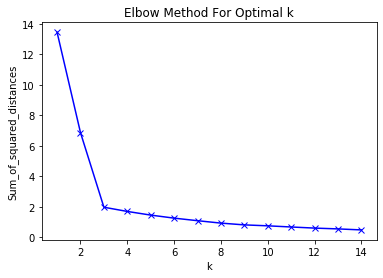

In [92]:
# ELBOW
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project